<a href="https://colab.research.google.com/github/Fadelmuhammad013/Machine-learning/blob/main/06.%20Week%206/Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Online Retail.xlsx to Online Retail.xlsx


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform

In [11]:
# Pastikan nama file sesuai hasil upload
df = pd.read_excel('Online Retail.xlsx')

# Tampilkan 5 data teratas
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
# Buang data yang tidak valid
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df.dropna(inplace=True)

# Buat fitur baru
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Sampling data agar lebih cepat proses
sample_df = df.sample(n=3000, random_state=42)

# Ambil fitur numerik untuk clustering
X = sample_df[['Quantity', 'UnitPrice', 'TotalPrice']]

# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
# KMeans dengan 4 cluster
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluasi cepat
s_score = silhouette_score(X_scaled, kmeans_labels)
ch_score = calinski_harabasz_score(X_scaled, kmeans_labels)
db_score = davies_bouldin_score(X_scaled, kmeans_labels)

print(f"Silhouette Score: {s_score:.3f}")
print(f"Calinski-Harabasz Index: {ch_score:.2f}")
print(f"Davies-Bouldin Index: {db_score:.3f}")


Silhouette Score: 0.957
Calinski-Harabasz Index: 2160.06
Davies-Bouldin Index: 0.377


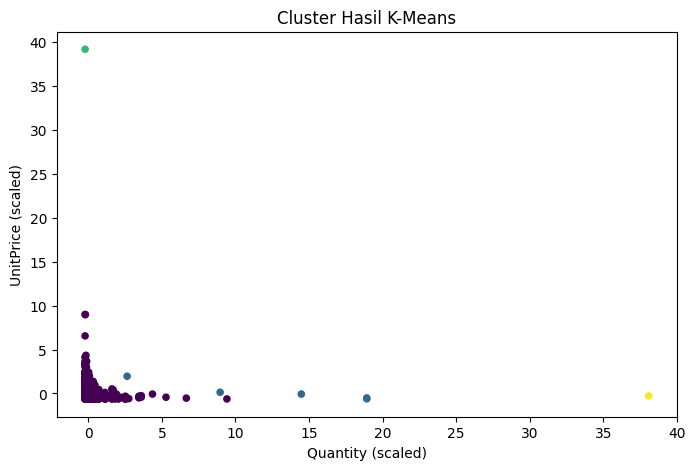

In [14]:
# Visualisasi cluster 2D (pakai Quantity dan UnitPrice)
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=20)
plt.title('Cluster Hasil K-Means')
plt.xlabel('Quantity (scaled)')
plt.ylabel('UnitPrice (scaled)')
plt.show()


In [15]:
# DBSCAN (ringan, tapi hati-hati bisa hasilkan banyak noise)
dbscan = DBSCAN(eps=0.8, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Filter noise
mask = dbscan_labels != -1

# Evaluasi cepat
if len(set(dbscan_labels[mask])) > 1:
    sil = silhouette_score(X_scaled[mask], dbscan_labels[mask])
    ch = calinski_harabasz_score(X_scaled[mask], dbscan_labels[mask])
    db = davies_bouldin_score(X_scaled[mask], dbscan_labels[mask])
    print(f"DBSCAN - Silhouette: {sil:.3f}, CH: {ch:.2f}, DB: {db:.3f}")
else:
    print("DBSCAN menghasilkan 1 cluster saja atau hanya noise.")


DBSCAN menghasilkan 1 cluster saja atau hanya noise.


**Penjelasan Matematis**

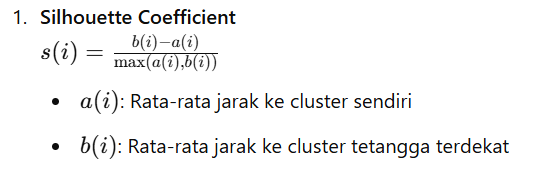

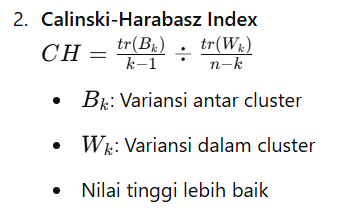

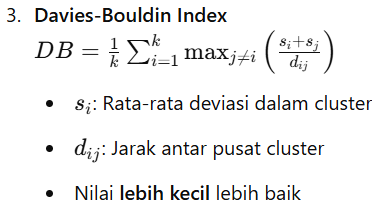

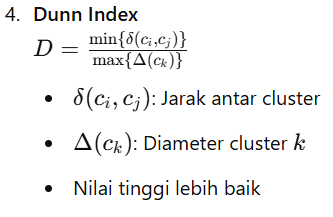

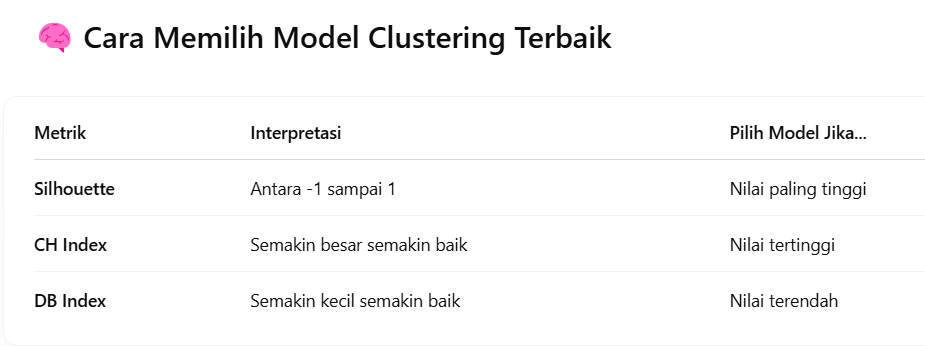